🔹 First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species     

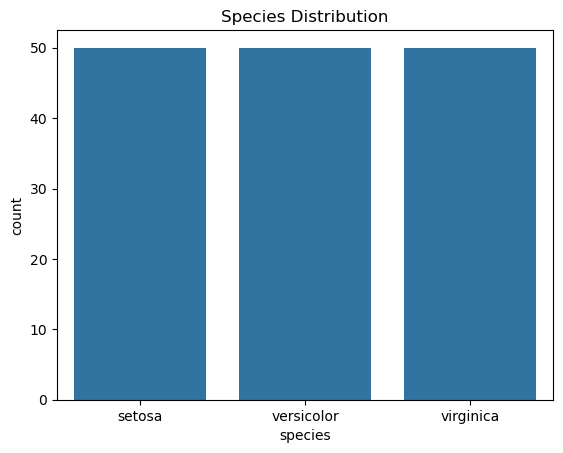

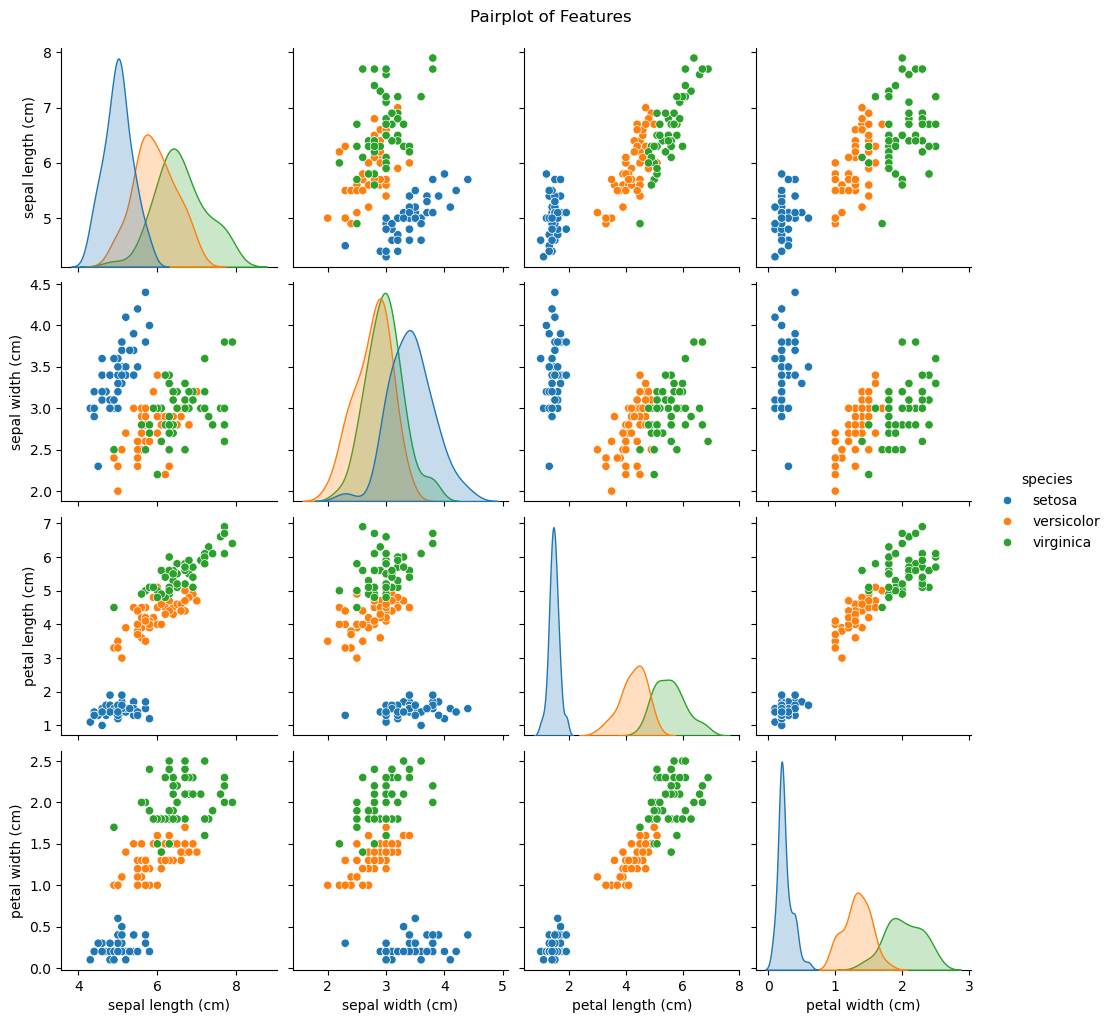

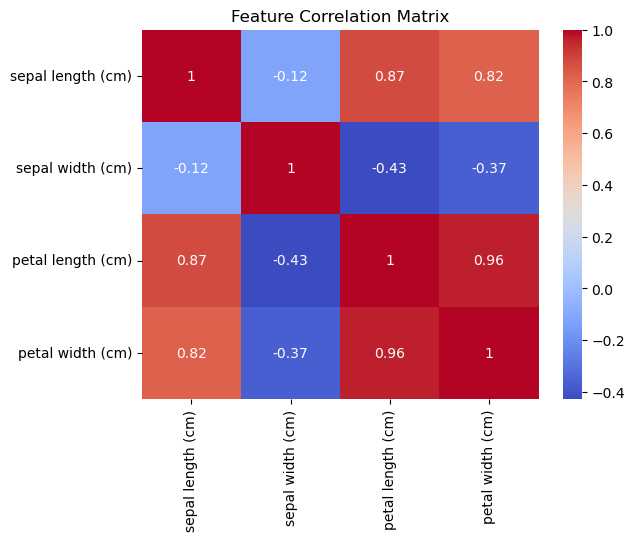

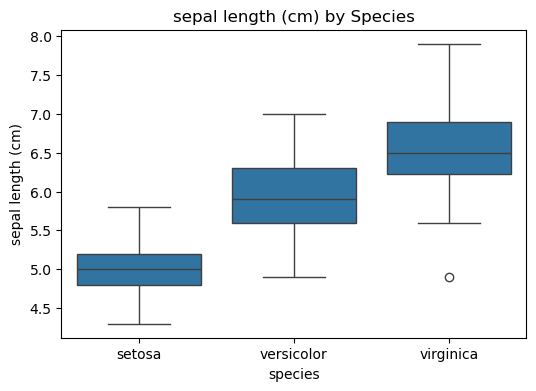

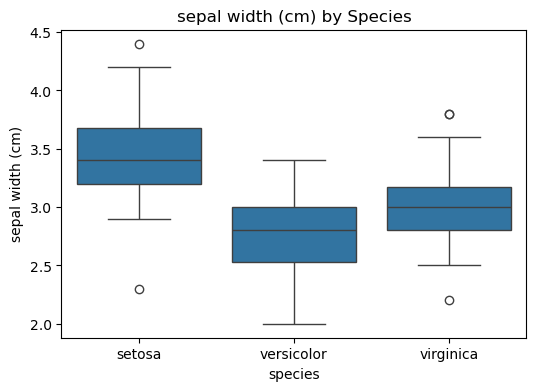

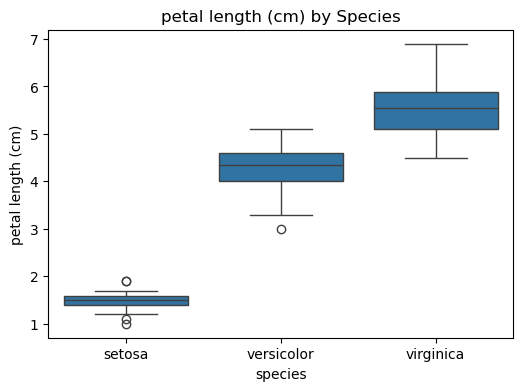

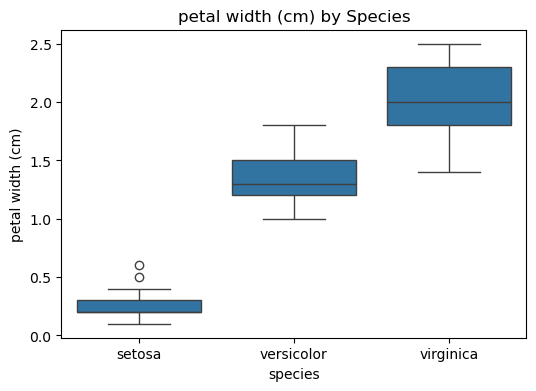


✅ Accuracy: 0.9333333333333333

📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



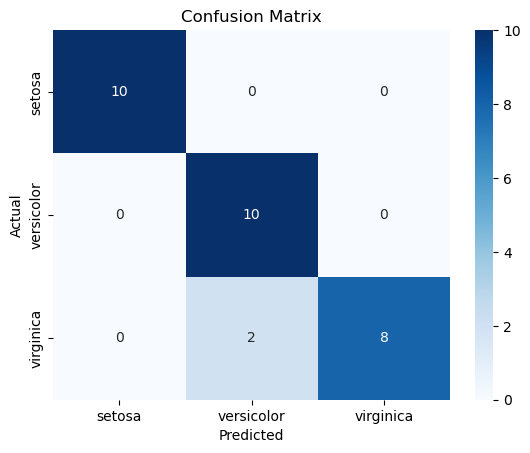

In [10]:
# 🌸 Iris Classification Project using KNN
# Author: Vadiraja Rawdoor

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = pd.Series(iris.target).map(species_map)

# Step 3: Data Exploration
print("🔹 First 5 rows of dataset:")
print(df.head())
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Summary Statistics:")
print(df.describe())

# Step 4: Visualization

# 4.1 Species Distribution
sns.countplot(x='species', data=df)
plt.title('Species Distribution')
plt.show()

# 4.2 Pair Plot
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# 4.3 Correlation Matrix
corr_matrix = df.drop('species', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 4.4 Boxplots
for feature in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.show()

# Step 5: Data Preprocessing

# 5.1 Feature and Target Separation
X = df.drop('species', axis=1)
y = df['species']

# 5.2 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 5.3 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 7: Predictions
y_pred = knn.predict(X_test)

# Step 8: Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
